In [2]:
def preprocess_comment(comment):
    # Tokenization
    tokens = nltk.word_tokenize(comment)

    # Remove URL/HTTP
    tokens = [re.sub(r'http\S+|www.\S+', '', token) for token in tokens]

    # Remove hashtags
    tokens = [token for token in tokens if not token.startswith('#')]

    # Remove usernames/user mentions
    tokens = [token for token in tokens if not token.startswith('@')]

    # Menghilangkan emotikon
    tokens = [re.sub(r'[^\w\s\d]', '', token) for token in tokens]

    # Remove symbols and numbers
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens]

    # Lowercase
    tokens = [token.lower() for token in tokens]

    # Remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))
    tokens = [token for token in tokens if token not in stopwords]

    # Join tokens back to a single string
    preprocessed_comment = ' '.join(tokens)

    return preprocessed_comment

In [1]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv("Summarization 1000 sentiment tokopedia playstore.csv", header=0, parse_dates=[0], index_col=0)
df['Summary'] = df['Summary'].apply(preprocess_comment)

In [4]:
df

,Original,Summary,Sentiment
0,"Meresahkan. Iya sih promonya menarik, tapi kur...",iya sih promonya menarik tapi kurirnya ga ber...,-1
1,Di tingkatkan lagi informasi pelacakan barang ...,informasi saja sudah cukup di tingkatkan lagi...,0
2,rewel di tagih terus kaya bocah .satu hari.lam...,rewel di tagih terus kaya bocah satu harilamba...,-1
3,"Kurangin bintang lah,biaya aplikasi naik",kurangin bintang lah biaya aplikasi naik,-1
4,"suka sama paket belanja 10K dari tokped, semog...",suka sama paket belanja k dari tokped semoga ...,1
...,...,...,...
995,Tlong donk tokopedia belanja 50 atau pas promo...,tlong donk tokopedia belanja atau pas promo f...,-1
996,Sangat mudah di mengerti,sangat mudah di mengerti,1
997,Makin kesini gratis ongkir makin terbatas. Pad...,padahal sudah member gold,-1
998,Parah banget skrg kalo checkout ada biaya laya...,parah banget skrg kalo checkout ada biaya laya...,-1


In [5]:
# Separate each sample based on sentiment
positive_df = df[df['Sentiment'] == 1]
neutral_df = df[df['Sentiment'] == 0]
negative_df = df[df['Sentiment'] == -1]

print("Positive samples:")
print(positive_df)

print("\nNeutral samples:")
print(neutral_df)

print("\nNegative samples:")
print(negative_df)

Positive samples:
                                              Original  \
4    suka sama paket belanja 10K dari tokped, semog...   
5                                     sangat memuaskan   
6             sangat membatu terima kasih Tokopedia 🙏🙏   
7                                terimakasih promonya.   
8                                    sangat membantu ✨   
..                                                 ...   
991         Oke.. Mantab. Belanja disini murah meriah.   
992                                               bgus   
993  Tetap Tokped yang paling terbaik dari marketpl...   
996                           Sangat mudah di mengerti   
999                                              Mntap   

                                               Summary  Sentiment  
4    suka sama paket belanja 10K dari tokped, semog...          1  
5                                     sangat memuaskan          1  
6             sangat membatu terima kasih Tokopedia 🙏🙏          1  
7            

Topik ke- 1
1000 nih daganganya menu menyukai

Topik ke- 2
1000 nih daganganya menu menyukai

Topik ke- 3
sangat dan membantu bagus tokopedia



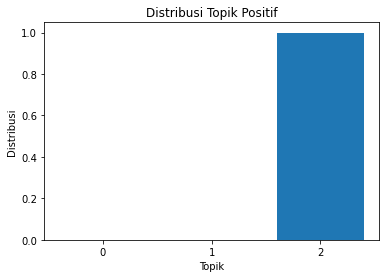

In [6]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

# Menggabungkan semua teks menjadi satu
keseluruhan_positif = ' '.join(positive_df['Summary'])

X = vectorizer.fit_transform([keseluruhan_positif])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik Positif')
plt.xticks(range(num_topics))
plt.show()

Topik ke- 1
ysl klo keluar kemarin kentang

Topik ke- 2
di bisa aplikasi ada tokopedia

Topik ke- 3
ysl klo keluar kemarin kentang



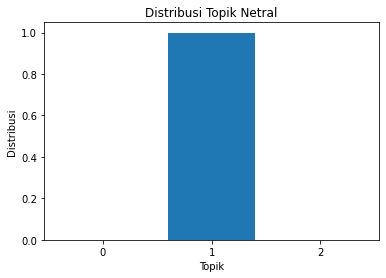

In [7]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

# Menggabungkan semua teks menjadi satu
keseluruhan_netral = ' '.join(neutral_df['Summary'])

X = vectorizer.fit_transform([keseluruhan_netral])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik Netral')
plt.xticks(range(num_topics))
plt.show()

Topik ke- 1
kuotanya lgsg like lipat brng

Topik ke- 2
kuotanya lgsg like lipat brng

Topik ke- 3
di biaya aplikasi tokopedia saya



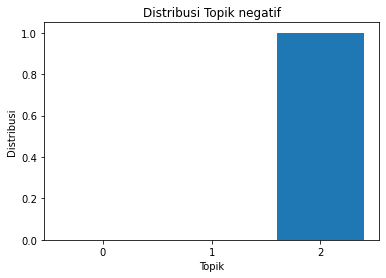

In [8]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

# Menggabungkan semua teks menjadi satu
keseluruhan_negatif = ' '.join(negative_df['Summary'])

X = vectorizer.fit_transform([keseluruhan_negatif])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik negatif')
plt.xticks(range(num_topics))
plt.show()

YearMonth: 2023-01
Topik ke- 1
yg voucer mantaf lazada krn

Topik ke- 2
yg voucer mantaf lazada krn

Topik ke- 3
promo melanggar lazada krn konsumen



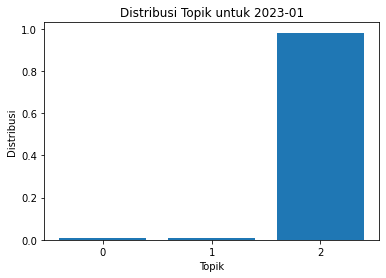


YearMonth: 2023-02
Topik ke- 1
barang ga tgl pengiriman nya

Topik ke- 2
yg feng kek kalo jijik

Topik ke- 3
yg feng kek kalo jijik



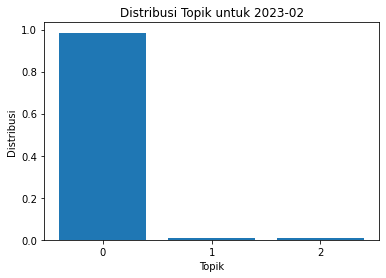


YearMonth: 2023-03
Topik ke- 1
yg ongkir bebas berjalan buka

Topik ke- 2
skrng berbeda dgn email tokopedia

Topik ke- 3
yg ongkir bebas berjalan buka



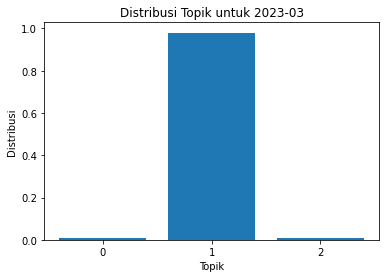


YearMonth: 2023-04
Topik ke- 1
belanja good yg top bagus

Topik ke- 2
yg kecewa bagus barang beli

Topik ke- 3
yg kecewa bagus barang beli



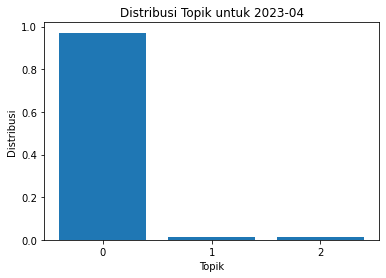


YearMonth: 2023-05
Topik ke- 1
pikirkan tolong tokopedia

Topik ke- 2
tolong pikirkan tokopedia

Topik ke- 3
tokopedia tolong pikirkan



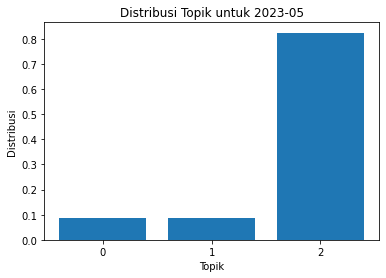

In [4]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

for index, row in df.iterrows():
    year_month = row['Month']
    text = row['Summary']

    # Membangun matriks frekuensi kata
    X = vectorizer.fit_transform([text])

    # Melatih model LDA
    num_topics = 3  # Jumlah topik yang diinginkan
    lda_model = LDA(n_components=num_topics)
    lda_model.fit(X)

    # Menampilkan kata-kata kunci untuk setiap topik
    feature_names = vectorizer.get_feature_names_out()
    print("YearMonth:", year_month)
    for topic_idx, topic in enumerate(lda_model.components_):
        keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
        print("Topik ke-", topic_idx+1)
        print(" ".join(keywords))
        print()

    # Visualisasi distribusi topik
    topic_distribution = lda_model.transform(X)
    plt.bar(range(num_topics), topic_distribution[0], align='center')
    plt.xlabel('Topik')
    plt.ylabel('Distribusi')
    plt.title('Distribusi Topik untuk ' + year_month)
    plt.xticks(range(num_topics))
    plt.show()
    print()
    print("==============================================")

Topik ke- 1
krn halo hemat hp iklan

Topik ke- 2
krn halo hemat hp iklan

Topik ke- 3
tokopedia yg barang ga pengiriman



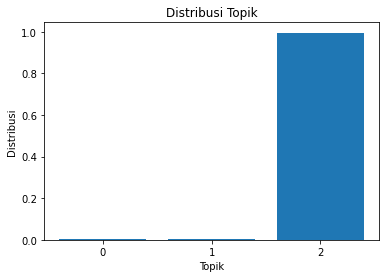

In [6]:
# Menggabungkan semua teks menjadi satu
keseluruhan_kalimat = ' '.join(df['Summary'])

X = vectorizer.fit_transform([keseluruhan_kalimat])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik')
plt.xticks(range(num_topics))
plt.show()